In [1]:
# number of organs
import os
base_path = '/home/ultrai/datasets/NuInsSeg/'
organ_num = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
print('total number of human and mosue organs:', len(organ_num))

total number of human and mosue organs: 31


In [2]:
# number of images in the entire dataset
from glob import glob                                 
img_path = f"{base_path}/*/tissue images/"  
img_num = glob('{}*{}'.format(img_path, 'png'))
print('total number of images:', len(img_num))    

total number of images: 665


In [3]:
# name of human and mouse organs
organ_names = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
organ_names.sort()

human_organs = [name for name in organ_names if 'human' in name]
mouse_organs = [name for name in organ_names if 'mouse' in name]

print('human organ names:')
print(f"{len(human_organs)} organs")
print(human_organs)
print()
print('mouse organ names:')
print(f"{len(mouse_organs)} organs")
print(mouse_organs)


human organ names:
23 organs
['human bladder', 'human brain', 'human cardia', 'human cerebellum', 'human epiglottis', 'human jejunum', 'human kidney', 'human liver', 'human lung', 'human melanoma', 'human muscle', 'human oesophagus', 'human pancreas', 'human peritoneum', 'human placenta', 'human pylorus', 'human rectum', 'human salivory gland', 'human spleen', 'human testis', 'human tongue', 'human tonsile', 'human umbilical cord']

mouse organ names:
8 organs
['mouse fat (white and brown)_subscapula', 'mouse femur', 'mouse heart', 'mouse kidney', 'mouse liver', 'mouse muscle_tibia', 'mouse spleen', 'mouse thymus']


In [4]:
# number of images  and nuclei (including or excluding vague areas) per human and mouse organ
import pandas as pd
import numpy as np
from PIL import Image

num_img_per_organ = []
num_nuclei_per_organ = []
avg_nuclei_size_per_organ = []
num_nuclei_per_organ_without_vague = []
for i in range(len(organ_names)):
    organ_path = ''.join([base_path, organ_names[i], '/tissue images/'])
    num_img_per_organ.append(len(glob('{}*{}'.format(organ_path, 'png'))))
    #number of nuclei
    label_mask_path = ''.join([base_path, organ_names[i], '/label masks modify/'])
    vague_mask_path = ''.join([base_path, organ_names[i], '/vague areas/mask binary/'])
    
    label_mask_name = glob('{}*{}'.format(label_mask_path, 'tif'))
    vague_mask_name = glob('{}*{}'.format(vague_mask_path, 'png'))
    
    label_mask_name.sort()
    vague_mask_name.sort()
    
    avg_nuclei_size_per_img = []
    nuclei_count_per_img = []
    nuclei_count_per_img_without_vague = []
    
    for j in range(len(label_mask_name)):
        label_mask = Image.open(label_mask_name[j])
        vague_mask = Image.open(vague_mask_name[j])
        
    
        label_mask_wo_vague = np.copy(label_mask)
        label_mask_wo_vague[vague_mask ==255] =0
        
        avg_nuclei_size_per_img.append(np.count_nonzero(label_mask)/(len(np.unique(label_mask))-1))
        nuclei_count_per_img.append(len(np.unique(label_mask))-1) # we do not count the background
        nuclei_count_per_img_without_vague.append(len(np.unique(label_mask_wo_vague))-1) # we do not count the background
        
    avg_nuclei_size_per_organ.append(np.round(np.mean(avg_nuclei_size_per_img),decimals = 2))
    num_nuclei_per_organ.append(np.sum(nuclei_count_per_img))
    num_nuclei_per_organ_without_vague.append(np.sum(nuclei_count_per_img_without_vague))
                                     
avg_nuclei_number_per_img = np.round(np.array(num_nuclei_per_organ)/np.array(num_img_per_organ), decimals=2)
vageu_percent = np.round(((np.array(num_nuclei_per_organ) - np.array(num_nuclei_per_organ_without_vague))/np.array(num_nuclei_per_organ)) *100, decimals=2)

organ_names[organ_names.index('mouse fat (white and brown)_subscapula')] = 'mouse fat' # just to have a clean table
    
df = pd.DataFrame({'organ':organ_names,
                   '#img':num_img_per_organ,
                   '#nuclei': num_nuclei_per_organ, 
                   '#avg nuclei/img': avg_nuclei_number_per_img,
                   'avg nuclei size': avg_nuclei_size_per_organ,
                   '#nuclei(W/O vague)': num_nuclei_per_organ_without_vague,
                   'vague (%)': vageu_percent})
df_no_indices = df.to_string(index=False)

print(df_no_indices)
print('======================')
print('total numebr of images: {}'.format(np.sum(num_img_per_organ)))
print('total numebr of nuclei: {}'.format(np.sum(num_nuclei_per_organ)))
print('total numebr of nuclei (vague excluded): {}'.format(np.sum(num_nuclei_per_organ_without_vague)))

organ_names[organ_names.index('mouse fat')] = 'mouse fat (white and brown)_subscapula' # geting back to real organ name

               organ  #img  #nuclei  #avg nuclei/img  avg nuclei size  #nuclei(W/O vague)  vague (%)
       human bladder    12      400            33.33           969.81                 400        0.0
         human brain    12      146            12.17           795.71                 146        0.0
        human cardia    12      671            55.92           698.02                 671        0.0
    human cerebellum    12      549            45.75           826.15                 549        0.0
    human epiglottis    11      228            20.73           562.65                 228        0.0
       human jejunum    10      874            87.40          1032.61                 874        0.0
        human kidney    11     1222           111.09          1014.75                1222        0.0
         human liver    40     1370            34.25          1384.50                1370        0.0
          human lung    11      318            28.91           763.15                 318  

# of nuclei in the image:  94
binary mask:  [  0 255]
w/o border erode - w/o border:  [0 1]


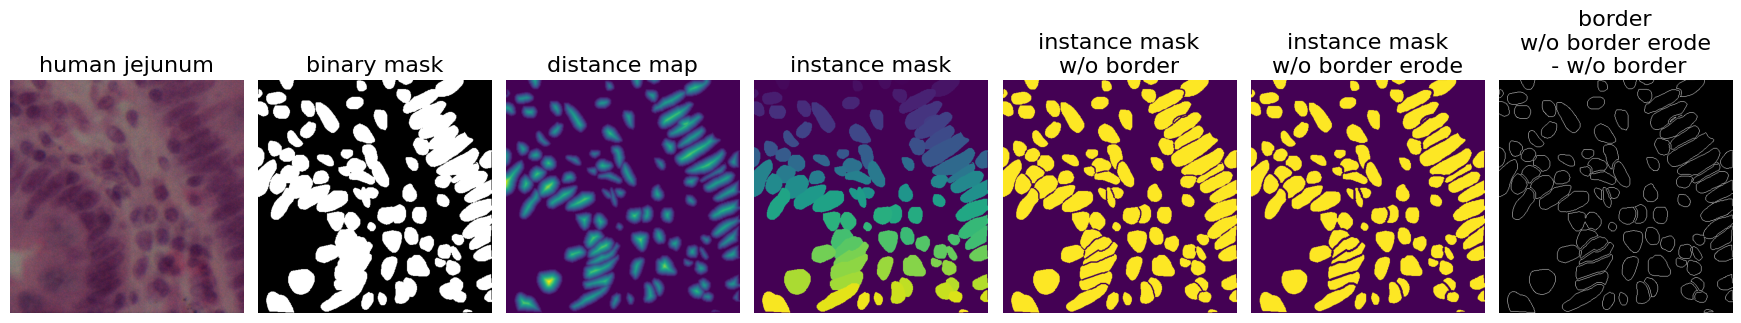

# of nuclei in the image:  47
binary mask:  [  0 255]
w/o border erode - w/o border:  [0 1]


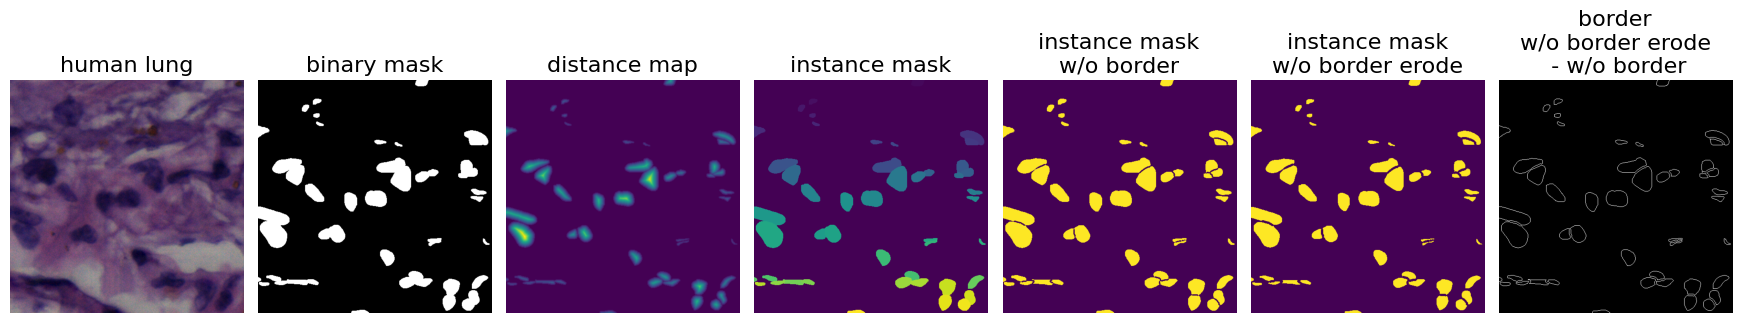

# of nuclei in the image:  69
binary mask:  [  0 255]
w/o border erode - w/o border:  [0 1]


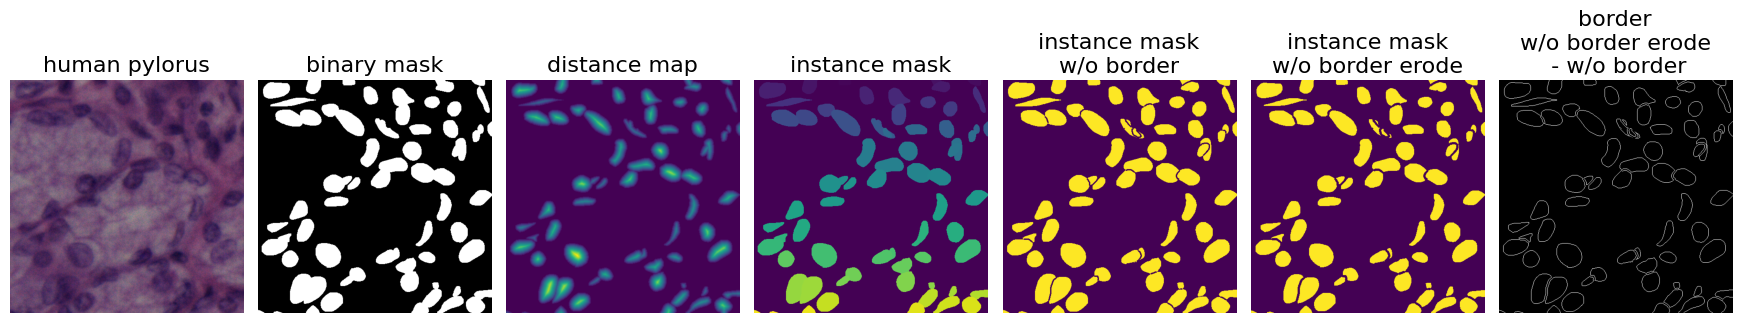

# of nuclei in the image:  17
binary mask:  [  0 255]
w/o border erode - w/o border:  [0 1]


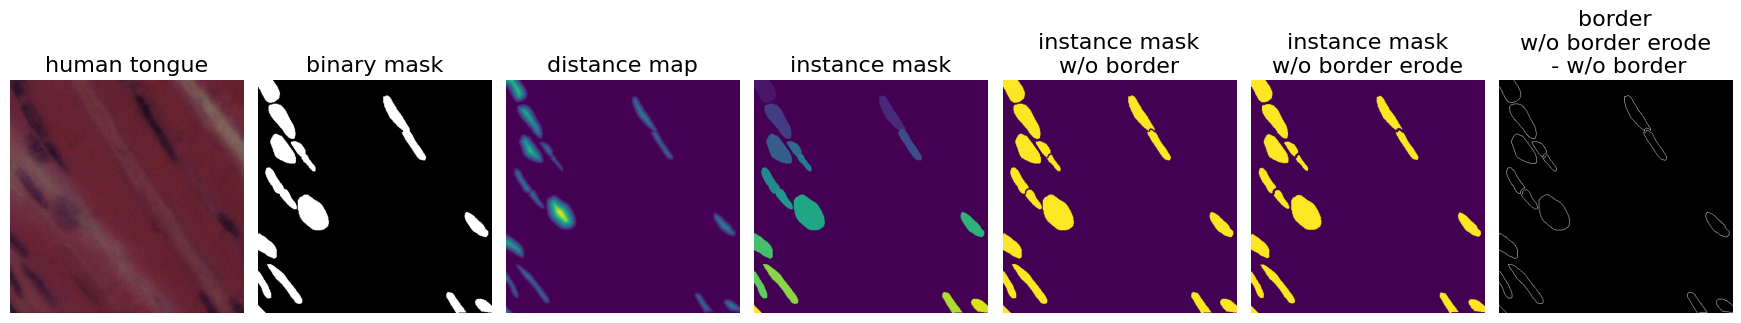

In [5]:
# 4 random samples for visualization
import matplotlib.pyplot as plt

for i in range(4):
    random_num1 = np.random.randint(len(organ_names))
    random_organ  = organ_names[random_num1]
    img_path = ''.join([base_path, random_organ, '/tissue images/'])
    img_list = glob('{}*{}'.format(img_path, 'png'))
    random_num2 = np.random.randint(len(img_list))
    img_name = img_list[random_num2].split('/')[-1].split('.')[0]
    
    
    img = np.array(Image.open((''.join([base_path, random_organ, '/tissue images/', img_name,'.png']))))
    img_binary_mask = np.array(Image.open((''.join([base_path, random_organ, '/mask binary/', img_name,'.png']))))
    img_distace = np.array(Image.open((''.join([base_path, random_organ, '/distance maps/', img_name,'.png']))))
    img_label_mask = np.array(Image.open((''.join([base_path, random_organ, '/label masks modify/', img_name,'.tif']))))
    img_vageu_mask = np.array(Image.open((''.join([base_path, random_organ, '/vague areas/mask binary/', img_name,'.png']))))
    img_label_mask_wo_border = np.array(Image.open((''.join([base_path, random_organ, '/mask binary without border/', img_name,'.png']))))
    img_label_mask_wo_border_erode = np.array(Image.open((''.join([base_path, random_organ, '/mask binary without border erode/', img_name,'.png']))))
    
    print("# of nuclei in the image: ", len(np.unique(img_label_mask))-1)

    plt.figure(figsize=(20,5))
    plt.subplot(1,8,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('{}'.format(random_organ[0:20]), fontsize = 16)
    
    print("binary mask: ", np.unique(img_binary_mask))
    plt.subplot(1,8,2)
    plt.imshow(img_binary_mask, cmap='gray')
    plt.axis('off')
    plt.title('binary mask', fontsize = 16)
    # plt.imshow(img_label_mask_wo_border_erode - img_label_mask_wo_border, alpha=0.5)
    
    plt.subplot(1,8,3)
    plt.imshow(img_distace)
    plt.axis('off')
    plt.title('distance map', fontsize = 16)
    
    
    plt.subplot(1,8,4) 
    plt.imshow(img_label_mask)
    plt.axis('off')
    plt.title('instance mask', fontsize = 16)
    
    # plt.subplot(1,8,5)   
    # plt.imshow(img_vageu_mask)
    # plt.axis('off')
    # plt.title('vague mask', fontsize = 16)

    plt.subplot(1,8,5)
    plt.imshow(img_label_mask_wo_border)
    plt.axis('off')
    plt.title('instance mask\nw/o border', fontsize = 16)

    plt.subplot(1,8,6)
    plt.imshow(img_label_mask_wo_border_erode)
    plt.axis('off')
    plt.title('instance mask\nw/o border erode', fontsize = 16)

    print("w/o border erode - w/o border: ", np.unique(img_label_mask_wo_border_erode - img_label_mask_wo_border))
    plt.subplot(1,8,7)
    plt.imshow(img_label_mask_wo_border_erode - img_label_mask_wo_border, cmap='gray')
    plt.axis('off')
    plt.title('border\nw/o border erode\n - w/o border', fontsize = 16)
    
    plt.tight_layout()
    plt.show()
    
    
    
   


In [6]:
df

,organ,#img,#nuclei,#avg nuclei/img,avg nuclei size,#nuclei(W/O vague),vague (%)
0,human bladder,12,400,33.33,969.81,400,0.0
1,human brain,12,146,12.17,795.71,146,0.0
2,human cardia,12,671,55.92,698.02,671,0.0
3,human cerebellum,12,549,45.75,826.15,549,0.0
4,human epiglottis,11,228,20.73,562.65,228,0.0
5,human jejunum,10,874,87.40,1032.61,874,0.0
6,human kidney,11,1222,111.09,1014.75,1222,0.0
7,human liver,40,1370,34.25,1384.50,1370,0.0
8,human lung,11,318,28.91,763.15,318,0.0
9,human melanoma,12,533,44.42,537.04,533,0.0


# Data distribution

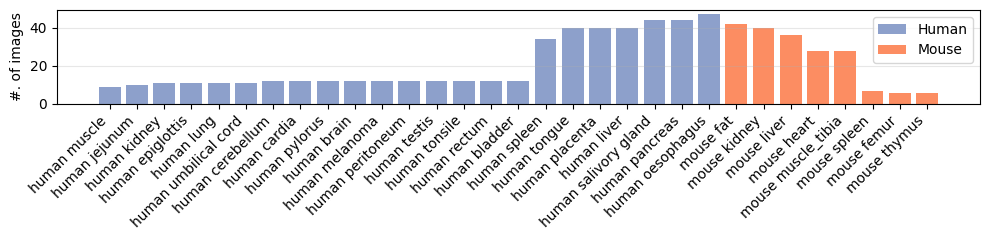

In [25]:
import matplotlib.pyplot as plt

# Filter and sort data
human_df = df[df['organ'].str.contains('human')].sort_values(by='#img', ascending=True)
mouse_df = df[df['organ'].str.contains('mouse')].sort_values(by='#img', ascending=False)

# Create a new figure
plt.figure(figsize=(10, 2.5))

# Plot human organs
plt.bar(human_df['organ'], human_df['#img'], color='#8da0cb', label='Human')

# Plot mouse organs with the same color
plt.bar(mouse_df['organ'], mouse_df['#img'], color='#fc8d62', label='Mouse')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.ylabel('#. of images')
# plt.title('Distribution of number of images for Each organ')
plt.tight_layout()
plt.grid(alpha=0.3, axis='y')
plt.legend()
plt.savefig('figures/dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
